In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

# 第32章 通道突破策略

## 32.1 通道突破簡介

股票市場的行情是隨機而起的，價格線的走勢往往給人一種「橫看成嶺側成峰，遠近高低各不同」的感覺。一個震盪到底隱含了趨勢或只是雜訊，那可真是言人人殊。通道模型適度解決了此一難題。它利用過去一定時間段內的價格訊息，繪製出上下兩條通道線（上、下軌），藉此設定股價的相對高、低界限。通道線可以包容市場波動行情的部分訊息，過濾震盪行情中均線系統「假」突破的信號。除了涵蓋了市場價格高低的訊息以外，兩條通道線的距離也體現了股票價格震盪的幅度；價格波動幅度較小時，通道的頻寬較小，當價格震蕩較大時，通道的頻寬也相應變大。通道突破模型將價格高低與價格震盪的幅度融合在一起，成為判斷市場中長期趨勢的常用技術分析指標。對於價格通道的刻畫，根據數據期數的不同和計算方式的迥異，模型的設定可以有諸多變化。本書在此介紹唐奇安通道（Donchian Channel）和布林帶通道（Bollinger Band）兩種技術分析常用的通道形式，並示範通道突破的思想。

## 32.2 唐奇安通道

唐奇安通道流行於二十世紀七十年代，由著名的海龜交易員 Richard Donchian 發明，最早用於日內交易。其主要思想是尋找一定時間內（比如 20 日）出現的最高價和最低價，將最高價和最低價分別作為通道的上下軌道。當價格突破通道的上軌道時，說明股價運動較為強勢，則釋放出買入信號；當價格線向下突破通道的下軌道時，空頭巿場較為強勢，市場下跌趨勢較為明顯，則釋放出賣出信號。

### 32.2.1 唐奇安通道刻畫

唐奇安通道由三條軌道線構成，上下軌道分別由20日的最高價和最低價來刻畫，中軌道是上下軌道的平均線，具體計算過程如下：

通道上界由 20 日的蠟燭圖的最高點構成，即

$$\mbox{通道上界}=\mbox{過去 20 日內的最高價}$$

通道下界由 20 日的蠟燭圖的最低點構成，即

$$\mbox{通道下界}=\mbox{過去 20 日內的最低價}$$

中軌道計算公式為：

$$\mbox{中軌道}=\frac{\mbox{通道上界}+\mbox{通道下界}}{2}$$

運用黑松（股票程式碼為「600050」）2010 年 1 月 4 日到 2013 年 12 月 31 日股票交易的日度數據，用 Python 來計算唐奇安通道的上中下三條軌道線。

In [2]:
# 讀取黑松的股票數據
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
HeySong = pd.read_csv('.\\PythonBook_code_data\\part5\\32\\1234.csv',sep='\t')
HeySong.index=pd.to_datetime(HeySong.Date, format='%Y-%m-%d')
# 提取收盤價、最高價和最低價數據
Close = HeySong.Close
High =  HeySong.High
Low =  HeySong.Low
# 求唐奇安上、中、下通道
upboundDC=[max(High[(i-20):i]) for i in range(20,len(Close))]
downboundDC = [min(Low[(i-20):i]) for i in range(20,len(Close))]
boundDC = pd.DataFrame()
boundDC['upboundDC']=upboundDC
boundDC['downboundDC']=downboundDC
boundDC['midboundDC']=0.5*(boundDC['upboundDC']+boundDC['downboundDC'])
boundDC.index = Close.index[20:]
print(boundDC.head())

            upboundDC  downboundDC  midboundDC
Date                                          
2015-02-02      35.79        34.59      35.190
2015-02-03      35.79        34.68      35.235
2015-02-04      35.79        34.87      35.330
2015-02-05      35.79        34.87      35.330
2015-02-06      35.79        34.87      35.330


Text(0.5, 1.0, '2015年上半年黑松股價唐奇安通道')

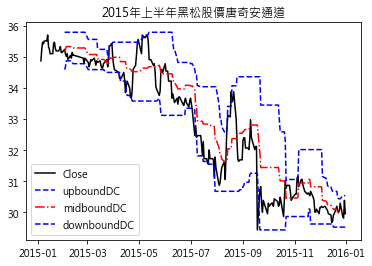

In [6]:
# 繪製2015年上半年黑松價格唐奇安通道上中下軌道線圖
plt.plot(Close['2015'],label="Close",color='k')
#plt.plot(upboundDC['2015'],label="upboundDC",color='b',linestyle='dashed')
#plt.plot(midboundDC['2015'],label="midboundDC",color='r',linestyle='-.')
#plt.plot(downboundDC['2015'],label="downboundDC",color='b',linestyle='dashed')
plt.plot(boundDC['upboundDC']['2015'],label="upboundDC",color='b',linestyle='dashed')
plt.plot(boundDC['midboundDC']['2015'],label="midboundDC",color='r',linestyle='-.')
plt.plot(boundDC['downboundDC']['2015'],label="downboundDC",color='b',linestyle='dashed')
plt.title("2015年上半年黑松股價唐奇安通道")
#plt.ylim(2.9,3.9)
plt.legend()

圖 32.1：2015年上半年黑松股價唐奇安通道線

從圖 32.1 來看，以價格運動的趨勢來觀察，2015 年 4 月以前，價格波動較小，價格線上下兩條通道內部運動，上下兩條通道的間距也較小。2015 年 4 月份以後，價格首先突然上升，然後又急劇下降，價格波動較大，價格線先後突破了上下兩條通道，上下兩條通道的距離也變大很多。

若要看到更多價格訊息和股票價格運動情況，可以在Ｋ線圖中繪製唐奇安的上下通道線，具體實現程式如下所示：

In [7]:
# 繪製黑松2013年上半年的Ｋ線圖及唐奇安通道
import candle
candel.candleLinePlots(candleData=HeySong[:'2015-06-30'],
        candleTitle='2015年上半年黑松股票的Ｋ線圖及唐奇安通道',
        splitFigures=False,
        Data=boundDC[:'2015-06-30'][['upboundDC','downboundDC']])

NameError: name 'candleLinePlots' is not defined

圖 32.2：2015年上半年黑松股票的Ｋ線圖及唐奇安通道

### 32.2.2 Python 捕捉唐奇安通道突破

唐奇安通道突破的主要規則是當價格線走強而突破前 $n$ 期的最高價時，做多；當價格線向下運動，價格低於前 $n$ 期的最低價時，做空。

以黑松 2015 年到 2016 年股價數據為例，設定時間段 $n=20$，捕捉唐奇安通道突破日期，設定買賣點交易，並計算交易獲勝率。

首先，先定義向上突破函數 upbreak() 和向下突破函數 downbreak()。

In [8]:
# upbreak()函數
def upbreak(tsLine,tsRefLine):
    n=min(len(tsLine),len(tsRefLine))
    tsLine=tsLine[-n:]
    tsRefLine=tsRefLine[-n:]
    signal=pd.Series(0,index=tsLine.index)
    for i in range(1,len(tsLine)):
        if all([tsLine[i]>tsRefLine[i],tsLine[i-1]<tsRefLine[i-1]]):
            signal[i]=1
    return(signal)

# downbreak()函數
def downbreak(tsLine,tsRefLine):
    n=min(len(tsLine),len(tsRefLine))
    tsLine=tsLine[-n:]
    tsRefLine=tsRefLine[-n:]
    signal=pd.Series(0,index=tsLine.index)
    for i in range(1,len(tsLine)):
        if all([tsLine[i]<tsRefLine[i],tsLine[i-1]>tsRefLine[i-1]]):
            signal[i]=1
    return(signal)

用 Python 撰寫程式模擬唐奇安通道策略。

In [9]:
# 唐奇安通道突破策略
UpBreak=upbreak(Close[boundDC.index[0]:],boundDC.upboundDC)
DownBreak=downbreak(Close[boundDC.index[0]:],boundDC.downboundDC)
# 制定交易策略
# 上穿，signal為1；
# 下穿，signal為-1。
# 合併上下穿破總信號
BreakSig=UpBreak-DownBreak
# 計算預測獲勝率
tradeSig=BreakSig.shift(1)
ret=Close/Close.shift(1)-1
tradeRet=(ret*tradeSig).dropna()
tradeRet[tradeRet==-0]=0
winRate=len(tradeRet[tradeRet>0])/len(tradeRet[tradeRet!=0])
winRate

0.5238095238095238

唐奇安通道突破策略的規則相對較簡單，但要注意，時間段 $n$ 的選擇尤為重要；在同一市場中 $n$ 取對於一支特定的股票，通道線的時間段設定，會影響通道的形狀和交易策略績效；相同的時間段也不見得適用於不同的股票。

## 32.3 布林帶通道

「布林通道」又稱布林帶狀（Bollinger Bands，BBands）或者保力加通道，是通道的形式之一；與唐奇安通道類似，布林帶通道也有刻畫股票價格變化情況和波動幅度大小的作用。布林帶通道是美國投資者約翰.布林格（John Bollinger）在 20 世紀後期結合統計學理論發明的一種技術分析指標。分析股價運動情況時，一般以股價平均線作為參照線，而布林帶在均線的基礎上増添上下兩條「股價通道」線。布林帶的中軌線是股價的平均線，上通道為股價的均線加上一定倍數的標準差，而下通道則由均線減去一定倍數的標準差得到。

布林帶通道的趨勢主要由中軌道平均線決定，當平均線呈現向上趨勢時，布林帶通道也會向上走，當平均線走低時，布林帶通道也會有向下趨勢。布林帶通道的頻寬由股價的標準差決定；而股價的標準差刻畫了股價波動範圍的大小，當股價波動較大時，標準差較大，進而布林帶上下通道的頻寬越大；反之，當股價波動幅度較小時，標準差越小，布林帶頻寬則會相應變窄。

### 32.3.1 布林帶通道的計算方式

令 $p_{t+1-n},p_{t+2-n},...,p_{t}$ 表示股票在第 $t$ 期觀測到的前 $n$ 期（包括第 $t$ 期）的股票價格，據此數據，可以計算股票的 $n$ 期均值（即布林帶的中軌線 $u_t$）為：

$$u_n=\frac{1}{n}\sum_{i=1}^np_i$$

用 $\overline{B}_n$ 表示布林帶的上軌線值，其可由下式計算而得。

$$\overline{B}_n=u_n+a\times\sigma_n$$

同理，用 $\underline{B}_n$ 表示布林的下軌線值，則

$$\underline{B}_n=u_n-a\times\sigma_n$$

其中，$\sigma_n$ 表示股票價格在過去 $n$ 期的標準差，計算公式為：

$$\sigma_n=\sqrt{\frac{1}{n}\sum_{i=1}^n(p_i-u_n)^2}$$

而 $a$ 表示標準差的倍數。

從上述計算公式中，可以看出時間區間 $n$ 和標準差倍數 $a$ 的取值，會影響到布林帶三條通道的計算結果。一般而言，$n$ 取值為 20 天，$a$ 取值為 2，依此設定，布林帶通道線的計算如下：

中軌道：

$$\mbox{均值}=\mbox{過去 20 天股價的算數平均值}$$

數學式可寫為：

$$u_{20}=\frac{1}{20}\sum_{i=1}^{20}p_i$$

股價的標準差為：

$$\sigma_{20}=\sqrt{\frac{1}{20}\sum_{i=1}^{20}(p_i-u_{20})^2}$$

上通道線：

$$\mbox{通界}=\mbox{均值}+2\times\mbox{過去 20 天股價的標準差}$$

計算公式為：

$$\overline{B}_{20}=u_{20}+2\times\sigma_{20}$$

下通道線：

$$\mbox{通道下界}=\mbox{均值}-2\times\mbox{過去 20 天股價的標準差}$$

計算公式為：

$$\underline{B}_{20}=u_{20}-2\times\sigma_{20}$$

接下來，設定 $n=20$，$a=2$ 用 Python 撰寫程式繪製黑松股價的布林帶通道線。首先定義布林帶通道函數 bbands()。

In [10]:
def bbands(tsPrice,period=20,times=2):
    upBBand=pd.Series(0.0,index=tsPrice.index)
    midBBand=pd.Series(0.0,index=tsPrice.index)
    downBBand=pd.Series(0.0,index=tsPrice.index)
    sigma=pd.Series(0.0,index=tsPrice.index)
    for i in range(period-1,len(tsPrice)):
        midBBand[i]=np.nanmean(tsPrice[i-(period-1):(i+1)])
        sigma[i]=np.nanstd(tsPrice[i-(period-1):(i+1)])
        upBBand[i]=midBBand[i]+times*sigma[i]
        downBBand[i]=midBBand[i]-times*sigma[i]
    BBands=pd.DataFrame({'upBBand':upBBand[(period-1):],\
                         'midBBand':midBBand[(period-1):],\
                         'downBBand':downBBand[(period-1):],\
                         'sigma':sigma[(period-1):]})
    return(BBands)

接下來，計算 20 日布林帶通道線。

In [12]:
HeySongBBands=bbands(Close,20,2)
print(HeySongBBands.head())

# 繪製2013年布林帶上下通道線
import candle
candle.candleLinePlots(candleData=HeySong[:'2015-06-3-'],candleTitle='2015年上半年黑松股票的Ｋ線圖及布林帶通道',splitFigures=False,Data=HeySongBBands[:'2015-6-30'][['downBBand','upBBand']])

              upBBand  midBBand  downBBand     sigma
Date                                                
2015-01-30  35.665309   35.2945  34.923691  0.185404
2015-02-02  35.630307   35.3130  34.995693  0.158654
2015-02-03  35.635387   35.3060  34.976613  0.164694
2015-02-04  35.627273   35.2830  34.938727  0.172137
2015-02-05  35.614050   35.2670  34.919950  0.173525


AttributeError: module 'candle' has no attribute 'candleLinePlots'

圖 32.3：2015年上半年黑松股票的Ｋ線圖及布林帶通道

觀察圖 32.3，整體上而言，2015 年上半年Ｋ線圖大都在布林帶通道內部運動，2015 年 2 月到 3 月份，黑松股價變換較小，股價基本上在布林帶通道內部運動，3 月 16 左右，蠟燭圖下穿了布林帶下通道，進而蠟燭圖反轉向上運動，而不久有上穿布林帶通道，隨後Ｋ線圖的走勢也轉而向下。2015 年 4 月 20 日，蠟燭圖轉而大幅向上，布林帶通道的頻寬增大，接下來有一段較為明顯的上漲行情。

## 32.4 布林帶通道與市場風險

布林帶通道的設定蘊含著統計學原理，假設股票價格走勢呈現正態分佈[<sup>3</sup>](#fn3)，如圖 32.4 所示，均值加減兩倍標準差範圍內的數據大概佔據了整個數據的 95.44%。布林帶通道以價格的平均值加減兩個標準差來設定上下通道，從正態分佈的角度來看，布林帶通道刻畫了股票價格的主要變化範圍，即大部分情況下股票價格應該在布林帶通道內部運動，只有大約 5% 的概率股價會突破布林帶通道的上軌道或者下軌道。因此在正常情況下，當價格線超出布林帶通道上下線時，可以認為價格線有偏離，未來價格很有可能回落到布林帶通道的內部。

圖 32.4：正態分佈域

由於布林帶通道的設定與標準差的倍數相關，有學者[<sup>4</sup>](#fn4)將布林帶通道與股市風險聯繫在一起分析市場行情。在股價運動分佈情況呈現出正態分佈的前提下，布林帶通道由平均線加減 2 倍標準差刻畫，由圖 32.4可推知，正常情況下，有 95.44% 的概率股價在正負兩倍標準差內部運動，當股價突破布林帶上下界時，說明股價出現了異常波動，異常波動的概率為 4.56%。將股價異常波動到布林帶上下通道外部的情況定義成「布林帶風險」（Bollinger Risk）。

<span id="fn3"><sup>3</sup> 這個假設是否合理，從邏輯的角度而言並不重要，重點在於讀者視它為「有待驗證的假設（Refutable Hypothesis）」</span>

<span id="fn4"><sup>4</sup> 陳慧藝，宴春寧《採用布林帶分析比較股市風險》當代經濟，2008 年第 2 期</span>


根據統計學原理，在信心水準為 $\alpha$ 的條件下，布林帶風險 $\mathit{BR}_\alpha$ 的計算公式為：

$$\mathit{BR}_\alpha=\frac{d_m}{d_t}\times 100\%$$

其中，$d_t$ 表示觀察的股價數據總期數，$d_m$ 表示觀察期內股價在布林帶上下通道外部的總期數。一般而言，信心水準 $\alpha$ 的可以取值為 1%，5% 或者 10%。在不同的信心水準下，布林帶上下通道的界定不同。

當 $\alpha=10\%$時，布林帶上通道線為 $\overline{B}_n=u_n+1.65\times\sigma_n$；布林帶的下通道為 $\underline{B}_n=u_n-1.65\times\sigma_n$；

當 $\alpha=5\%$時，布林帶上通道線為 $\overline{B}_n=u_n+1.96\times\sigma_n$；布林帶的下通道為 $\underline{B}_n=u_n-1.96\times\sigma_n$；

當 $\alpha=1\%$時，布林帶上通道線為 $\overline{B}_n=u_n+2.58\times\sigma_n$；布林帶的下通道為 $\underline{B}_n=u_n-2.58\times\sigma_n$；

下面設定不同的信心水準，來比較黑松股市年度布林帶風險。

首先構造布林帶風險函數 CalBollRisk() 函數

In [14]:
def CalBollRisk(tsPrice,k,multiplier):
    n=len(tsPrice)
    m=len(multiplier)
    tsPrice=tsPrice[k:]
    BollRisk=[]
    for i in range(m):
        BBands=bbands(tsPrice,k,multiplier[i])
        a=0
        b=0
        for j in range(len(BBands)):
            if tsPrice[j]>BBands.upBBand[j]:
                a+=1
            elif tsPrice[j]<BBands.downBBand[j]:
                b+=1
        BollRisk.append(100*(a+b)/n)
    return(BollRisk)

接下來，計算黑松股市不同年份的布林帶風險。

In [16]:
# 設定標準差的倍數向量
multiplier=[1,1.65,1.96,2,2.58]

# 計算不同年度的布林帶風險
# 2015年
price2015=Close['2015']
CalBollRisk(price2015,20,multiplier)
# 2016年
price2016=Close['2016']
CalBollRisk(price2016,20,multiplier)

[44.26229508196721,
 21.311475409836067,
 13.524590163934427,
 12.704918032786885,
 2.459016393442623]

[47.950819672131146,
 21.721311475409838,
 10.655737704918034,
 10.245901639344263,
 2.0491803278688523]

在不同信心水準下，黑松股市不同年度的的布林帶風險數據整理成如表 32.1 所示：

>表 32.1：黑松股市年度布林帶風險

　    |2015年|2016年
:----:|:----:|:----:
$\alpha=31.74\%,\mathrm{sd}=1$|44.262|47.951
$\alpha=10\%,\mathrm{sd}=1.65$|21.311|21.721
$\alpha=5\%,\mathrm{sd}=1.96$ |13.525|10.656
$\alpha=4.56\%,\mathrm{sd}=2$ |12.705|10.246
$\alpha=1\%,\mathrm{sd}=2.58$ | 2.459| 2.049

分析表 32.1 中的數據，對於年度布林帶風險數據，信心水準 $\alpha$ 取值越大時，對應的布林帶越窄，股價突破布林帶上下界的機會就越大，因此呈現出來的布林帶風險也隨之變大。整體上來看，黑松股票 2016 年的布林帶風險比 2015 年高。

## 32.5 通道突破交易策略的制定

### 32.5.1 一般布林帶上下通道突破策略

布林帶通道最常見的策略，就是根據價格線突破布林帶通道上下界來制定交易策略。

* 當股價向上突破布林帶上通道時，股票可能產生了異常上漲，未來股價會跌落到布林帶通道內部，此時宜做空；

* 當股價向下突破布林帶上通道時，股票可能產生了異常跌勢，未來股價會上升到布林帶通道內部，此時宜做多。

運用黑松股票的交易數據，用 Python 撰寫程式來捕捉價格突破布林帶上下通道日期，制定交易策略並計算平均獲勝收益率。

In [17]:
# 布林帶上下通道突破策略
BBands=bbands(Close,20,2)
upbreakBB1=upbreak(Close,BBands.upBBand)
downbreakBB1=downbreak(Close,BBands.downBBand)

# 信號出現2天后進行交易
upBBSig1=-upbreakBB1.shift(2)
downBBSig1=downbreakBB1.shift(2)
tradSignal1=upBBSig1+downBBSig1
tradSignal1[tradSignal1==-0]=0

進行交易評價之前，先構造交易評價函數 perform()，設定函數參數為價格 tsPrice 和交易信號 tsTradSig。

In [24]:
def perform(tsPrice,tsTradSig):
    ret=tsPrice/tsPrice.shift(1)-1
    tradRet=(ret*tsTradSig).dropna()
    ret=ret[-len(tradRet):]
    winRate=[len(ret[ret>0])/len(ret[ret!=0]),\
             len(tradRet[tradRet>0])/len(tradRet[tradRet!=0])]
    meanWin=[np.mean(ret[ret>0]),\
             np.mean(tradRet[tradRet>0])]
    meanLoss=[np.mean(ret[ret<0]),\
             np.mean(tradRet[tradRet<0])]
    Performance=pd.DataFrame({'winRate':winRate,'meanWin':meanWin,\
                             'meanLoss':meanLoss})
    Performance.index=['Stock','Trade']
    return(Performance)

接下來運用績效表現函數 perform() 來計算布林帶交易的績效表現以及股票本身的績效表現。下列程式結果第一列「row」表示布林帶交易策略的績效表現，第二列表示股票本身的績效表現。

In [25]:
# 計算平均損失收益率、平均獲勝收益率以及交易獲勝率
Performance1= perform(Close,tradSignal1)
Performance1

,winRate,meanWin,meanLoss
Stock,0.485577,0.007490,-0.007364
Trade,0.619048,0.007147,-0.008658


### 32.5.2 另一種布林帶通道突破策略

布林帶通道的上下軌道線的刻畫，由選取的時間週期和標準差倍數兩部分決定。不同的時間週期參數和標準差倍數可以刻畫出不同的上下軌道線，進而股價穿破布林帶上下軌道的情形則會不同。如果布林帶通道線設定不夠合理，股票價格向上穿過布林帶上通道線以後，中短期內一直處於上升趨勢，而不會回落到通道線內部，或者股價跌破布林帶下通道線以後可能會比較晚回升到下通道線上方。為了降低「回落到通道內部」這個期望落空的風險，可以改變布林帶通道突破交易策略。

交易規則如下：

* 當價格線由布林帶上通道線的上方下穿到布林帶通道內部時，說明股價從異常上升行期中將要回覆到正常波動行期，股價短期有下跌趨勢，此時才做空；

* 當價格線由布林帶下通道線的下方上穿到布林帶通道內部時，說明股價從異常下跌行期中將要回覆到正常波動行期，股價短期有上升趨勢，此時才做多；

運用黑松股票的交易數據，撰寫 Python 程式模擬此策略，並計算策略績效。

In [26]:
# 另一種布林帶通道突破策略
# 價格向上穿下通道，做多
# 價格向下穿上通道，做空
upbreakBB2=upbreak(Close,BBands.downBBand)
downbreakBB2=downbreak(Close,BBands.upBBand)
# 交易執行
upBBSig2=upbreakBB2.shift(2)
downBBSig2=-downbreakBB2.shift(2)
tradSignal2=upBBSig2+downBBSig2
tradSignal2[tradSignal2==-0]=0
Performance2= perform(Close,tradSignal2)
Performance2

,winRate,meanWin,meanLoss
Stock,0.485577,0.007490,-0.007364
Trade,0.500000,0.004558,-0.007307


從表現結果看，針對該股票，此交易策略的績效表現與前面一般布林帶策略的績效表現差異不大，但其為我們提供一種新的布林帶交易策略的思考方向，如果用此策略測試其他股票或者設定不同的布林帶間隔日期，說不定會獲得不錯的效果。